# **Laporan Proyek Machine Learning - Fadhel Muhammad Apriansyah**
---
## Project overview
---
- Latar Belakang

Proyek ini bertujuan untuk membangun sistem rekomendasi produk fashion yang dipersonalisasi untuk meningkatkan pengalaman berbelanja pengguna. Pengguna sering merasa kesulitan menemukan produk yang sesuai dengan preferensi mereka karena banyaknya pilihan yang tersedia. Oleh karena itu, sistem rekomendasi dapat membantu memfilter produk berdasarkan preferensi pengguna dan meningkatkan kepuasan belanja.
<br><br>
Dalam industri fashion, personalisasi dapat memberikan nilai tambah yang signifikan. Dengan menyediakan rekomendasi yang relevan, perusahaan dapat meningkatkan retensi pelanggan, frekuensi pembelian, dan loyalitas pelanggan. Pada beberapa aplikasi e-commerce Banyak pelanggan yang membeli produk fashion yang sedang trena tau  yang diinginkan melalui aplikasi e-commerce, namun untuk membeli atau berbelanja fashion terutama pakaian secara online juga perlu berhati-hati karena ada beberapa hal yang perlu diperhitungkan. Ukuran baju merupakan tujuan utama pelanggan saat ini memilih baju yang pas bagi tubuhnya.
<br><br>
Riset Terkait:

[1] https://jurnal.unw.ac.id/index.php/jamastika/article/view/2402/2181

[2] https://journal.stekom.ac.id/index.php/elkom/article/download/645/541/

[3] https://e-journal.uajy.ac.id/23371/1/1607086671.pdf

# **Business Understanding**

- Problem Statements:
1. Pengguna kesulitan menemukan produk fashion yang sesuai dengan preferensi pribadi mereka karena banyaknya pilihan produk yang tersedia di platform e-commerce.
2. Kurangnya personalisasi dalam rekomendasi produk mengakibatkan rendahnya retensi pelanggan dan konversi penjualan.
3. Sistem rekomendasi saat ini tidak mampu memberikan rekomendasi yang tepat untuk pengguna baru atau produk baru karena keterbatasan data historis.

- Goals:
1. Mengembangkan sistem rekomendasi yang dapat memfilter produk sesuai preferensi pengguna berdasarkan atribut produk seperti kategori, warna, dan brand.
2. Meningkatkan retensi dan konversi pelanggan melalui rekomendasi yang dipersonalisasi dengan memanfaatkan teknik collaborative filtering untuk mengidentifikasi preferensi pengguna lain yang serupa.
3. Membangun sistem rekomendasi hybrid yang menggabungkan content-based filtering dan collaborative filtering untuk memberikan rekomendasi yang lebih baik pada pengguna baru dan produk baru.

- Solution Approach:

Solution 1: Content-Based Filtering menggunakan atribut produk seperti kategori, brand, dan warna untuk menemukan produk yang mirip. Metode ini efektif untuk memberikan rekomendasi pada produk baru yang belum memiliki banyak ulasan.

Solution 2: Collaborative Filtering menggunakan algoritma SVD untuk memprediksi preferensi pengguna berdasarkan pola perilaku pengguna lain yang serupa. Metode ini efektif dalam menangkap tren umum pengguna yang sudah aktif.

Solution 3: Sistem rekomendasi hybrid yang menggabungkan kedua metode di atas untuk memberikan rekomendasi yang lebih akurat, baik untuk pengguna baru maupun pengguna yang sudah memiliki riwayat belanja.

# **Data Understanding**

Dataset yang digunakan terdiri dari 1000 baris data dan 9 kolom yang mencakup informasi seperti User ID, Product ID, Product Name, Brand, Category, Price, Rating, Color, dan Size. Data ini tidak memiliki nilai yang hilang, sehingga semua data dapat langsung digunakan untuk analisis dan pemodelan.

Variabel-variabel pada dataset adalah sebagai berikut:

1. User ID: Identitas unik untuk setiap pengguna.
2. Product ID: Identitas unik untuk setiap produk.
3. Product Name: Nama produk yang dijual.
Brand: Merek dari produk tersebut, seperti Nike, Gucci, Zara.
4. Category: Kategori fashion seperti Men's Fashion, Women's Fashion, dan Kids' Fashion.
5. Price: Harga produk dalam USD.
6. Rating: Nilai kepuasan pengguna terhadap produk, berkisar antara 1 hingga 5.
7. Color: Warna produk, seperti merah, biru, hitam.
8. Size: Ukuran produk, seperti S, M, L, XL.

# **Berikut adalah tahapan tahapan dalam analisis data ini**

# **1. Import Library yang dibutuhkan**

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357281 sha256=3ed9093904eeed89932171f1413f8c7d739ac4c1af77d67de89f162fe3c2f4e8
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Embedding, Flatten, Dot, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# **2. Read Dataset**

In [3]:
df = pd.read_csv('/content/fashion_products.csv')
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


# **3. Analisis Deskriptif**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


menampilkan informasi dari dataset yang digunakan, dari dataset tersebut memiliki ukuran 1000 baris dan 9 kolom, berikut adalah nama kolom yang ada pada dataset yaitu:

 1.   **User ID**       dengan tipe data   int64  
 2.   **Product ID**    dengan tipe data   int64  
 3.   **Product Name**  dengan tipe data   object
 4.   **Brand**         dengan tipe data   object
 5.   **Category**      dengan tipe data   object
 6.   **Price**         dengan tipe data   int64  
 7.   **Rating**        dengan tipe data   float64
 8.   **Color**         dengan tipe data   object
 9.   **Size**          dengan tipe data   object


 dataset yang digunakan tidak memiliki nilai null

In [5]:
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


Hasil dari statistik deskriptif menunjukan:

1. untuk harga produk:

- rata-rata harga produk adalah 55.78$

- nilai minimun untuk harga produk adalah 10$

- nilai max untuk harga produk adalah 100$

2. Untuk rating:

- rata-rata rating 2.99

- minimum rating 1

- max rating 4.98

# **4. Visualisasi distribusi data variabel kategorikal**

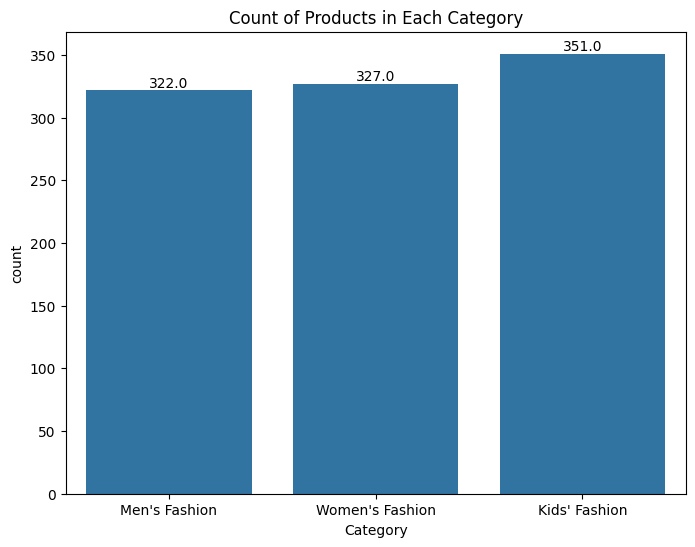

In [6]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Category')
plt.title('Count of Products in Each Category')

# Adding the total count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()


Dari visualisasi bar tersebut menunjukan produk untuk kategori fashion anak adalah yang paling tinggi dengan total 351 produk, disusul dengan fashion wanita sebanyak 327 produk dan fashion pria sebanyak 322 produk

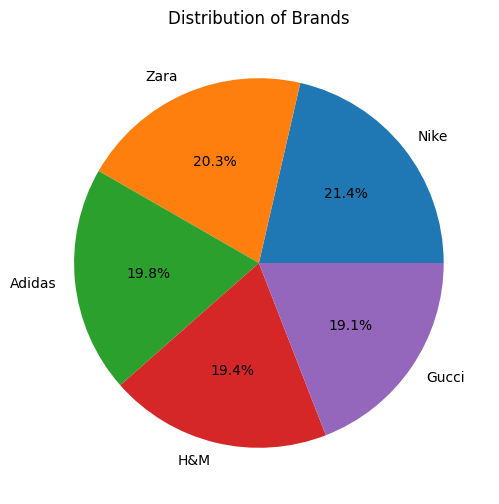

In [7]:
plt.figure(figsize=(8, 6))
df['Brand'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Brands')
plt.ylabel('')
plt.show()

pada visualisai diagram pie tersebut menunjukan brand Nike menjadi yang tertinggi yaitu sebesar 21.4%, disusul dengan brand zara dengan 20.3%, dan untuk brand adidas, guccim H&M dibawah 20%

# **5. Distribusi Harga dan Rating**

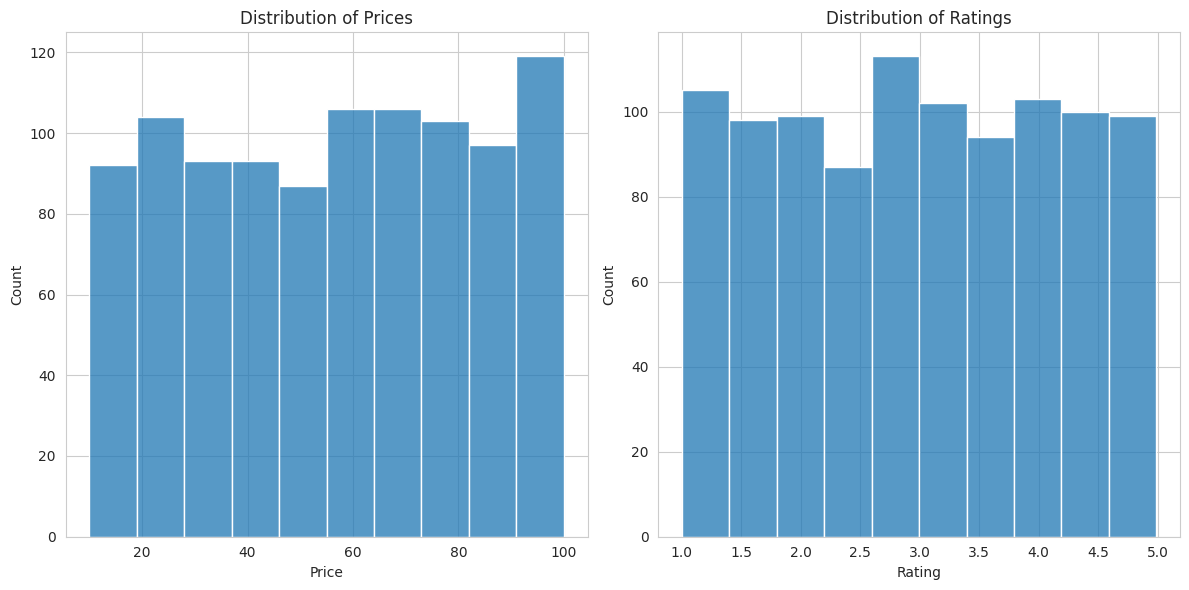

In [8]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution of prices
sns.histplot(data=df, x='Price', bins=10, ax=axes[0])
axes[0].set_title('Distribution of Prices')

# Plot distribution of ratings
sns.histplot(data=df, x='Rating', bins=10, ax=axes[1])
axes[1].set_title('Distribution of Ratings')
plt.tight_layout()
plt.show()

Distribusi Harga (Price):
1. Penyebaran Harga: Distribusi harga produk cukup merata di berbagai rentang harga. Terdapat jumlah produk yang cukup konsisten di berbagai rentang harga, dengan sedikit penurunan pada rentang harga sekitar 60-70.
2. Rentang Harga Tertinggi: Produk dengan harga di atas 90 memiliki jumlah yang lebih tinggi dibandingkan rentang harga lainnya. Hal ini menunjukkan adanya minat atau jumlah produk yang lebih banyak di rentang harga tinggi.
3. Konsistensi Jumlah Produk: Secara keseluruhan, setiap rentang harga memiliki jumlah produk yang cukup konsisten, menunjukkan bahwa produk fashion tersebar di berbagai kelas harga tanpa ada dominasi signifikan pada kelas harga tertentu.


Distribusi Rating (Rating):
1. Penyebaran Rating: Distribusi rating produk fashion juga cukup merata di berbagai tingkatan rating dari 1 hingga 5, dengan sedikit fluktuasi di beberapa rating.
2. Rating Paling Populer: Rating 2.5 merupakan yang paling banyak diberikan, menunjukkan bahwa banyak pengguna memberikan rating rata-rata terhadap produk fashion ini.
3. Distribusi Rating Tinggi: Rating di atas 4 juga cukup banyak, menandakan bahwa ada sejumlah produk yang memiliki kualitas baik dan mendapatkan ulasan positif dari pelanggan.


Insight Bisnis:
1. Strategi Penetapan Harga: Dengan harga yang tersebar merata di semua rentang, perusahaan bisa mempertimbangkan untuk menawarkan produk fashion dengan harga premium (di atas 90) karena tampaknya ada jumlah produk yang lebih tinggi di rentang ini. Penawaran khusus atau eksklusif pada rentang harga tinggi bisa menarik lebih banyak pelanggan.
2. Peningkatan Kualitas: Meskipun ada beberapa produk yang mendapatkan rating tinggi, banyak produk yang berada di rating tengah (2.5). Ini menunjukkan bahwa ada ruang untuk meningkatkan kualitas produk atau layanan untuk mendapatkan ulasan yang lebih baik dan meningkatkan reputasi.
3. Segmentasi Pasar: Perusahaan dapat mempertimbangkan segmentasi pasar berdasarkan harga, dengan fokus pada produk premium dan standar, serta memastikan kualitas produk di semua rentang harga agar mendapatkan rating yang konsisten lebih tinggi.

# **6. analisis multivariat**

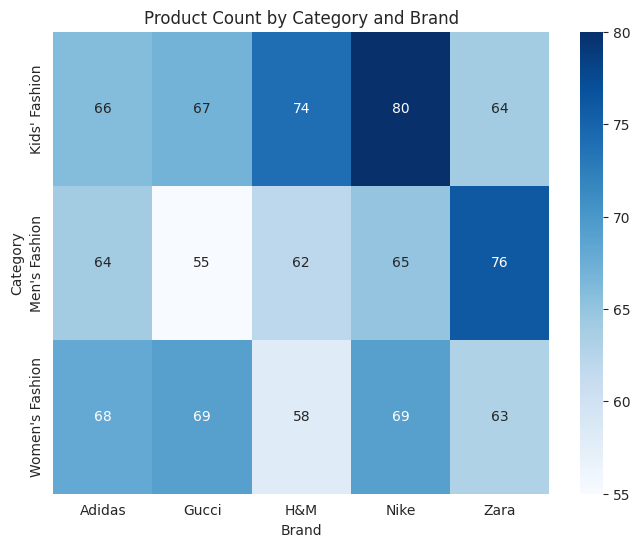

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 800x600 with 0 Axes>

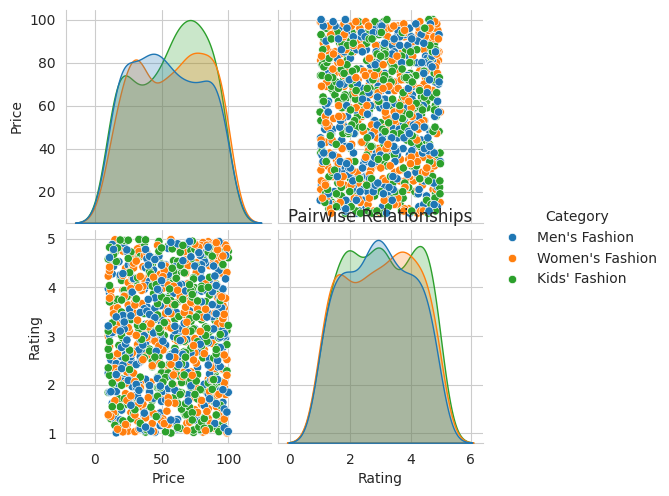

In [9]:
plt.figure(figsize=(8, 6))
category_brand_counts = df.groupby(['Category', 'Brand']).size().unstack()
sns.heatmap(data=category_brand_counts, cmap='Blues', annot=True, fmt='g')
plt.title('Product Count by Category and Brand')
plt.show()

plt.figure(figsize=(8, 6))
sns.pairplot(df[['Price', 'Rating', 'Category']], hue='Category')
plt.title('Pairwise Relationships')
plt.show()

Heatmap: Product Count by Category and Brand
1. Jumlah Produk per Kategori dan Brand:

- Nike dan Zara memiliki jumlah produk yang tinggi di semua kategori, dengan nilai maksimum pada kategori Kids' Fashion untuk Nike (80 produk) dan pada Men's Fashion untuk Zara (76 produk).
- H&M memiliki jumlah produk yang relatif lebih rendah dibandingkan brand lain di hampir semua kategori, terutama pada Women's Fashion (58 produk).
- Gucci dan Adidas memiliki distribusi produk yang cukup merata di semua kategori, dengan perbedaan yang tidak terlalu signifikan antar kategori.

2. Kesimpulan Bisnis:

- Nike dan Zara menunjukkan kehadiran yang kuat di semua segmen pasar, khususnya untuk fashion anak-anak dan pria. Ini dapat mencerminkan strategi diversifikasi produk yang baik.
- H&M mungkin perlu meningkatkan variasi atau kuantitas produknya, terutama di segmen Women's Fashion, untuk lebih bersaing dengan brand lain.
- Adidas dan Gucci mungkin fokus pada stabilitas distribusi produknya di semua kategori, yang dapat menunjukkan pendekatan pasar yang lebih seimbang.
Pairwise Relationships: Price dan Rating berdasarkan Kategori

3. Distribusi Harga Berdasarkan Kategori:

- Fashion Pria (Men's Fashion) memiliki distribusi harga yang lebih tinggi dibandingkan kategori lain, yang berarti produk dalam kategori ini cenderung memiliki harga lebih tinggi.
- Fashion Anak (Kids' Fashion) memiliki distribusi harga yang sedikit lebih rendah, menunjukkan bahwa produk dalam kategori ini biasanya ditawarkan dengan harga lebih terjangkau.

4. Distribusi Rating Berdasarkan Kategori:

- Distribusi rating terlihat merata di setiap kategori, tetapi Fashion Pria (Men's Fashion) menunjukkan sedikit konsistensi di rating tinggi.
- Fashion Wanita (Women's Fashion) dan Fashion Anak (Kids' Fashion) memiliki distribusi rating yang lebih menyebar. Ini bisa berarti adanya variasi kepuasan pelanggan yang lebih besar dalam kategori ini.

5. Hubungan Antara Harga dan Rating:

- Tidak ada korelasi yang jelas antara harga dan rating di semua kategori, yang menunjukkan bahwa harga produk tidak selalu memengaruhi kepuasan atau rating dari pelanggan.
- Untuk fashion pria, terdapat kecenderungan rating yang lebih tinggi pada produk dengan harga yang lebih tinggi, meskipun ini tidak selalu menjadi indikator utama.

6. Kesimpulan Bisnis:

- Strategi penentuan harga dapat dipertimbangkan lebih lanjut pada segmen fashion pria, di mana peningkatan harga mungkin diikuti dengan peningkatan persepsi kualitas.
- Perusahaan perlu mengevaluasi produk dalam kategori wanita dan anak-anak untuk memastikan bahwa harga produk sebanding dengan kualitas dan harapan pelanggan, guna mengurangi variasi rating yang terlalu besar.

# **7. Building Recommender system**


## content based Filtering

In [10]:
content_df = df[['Product ID', 'Product Name', 'Brand',
                   'Category', 'Color', 'Size']]
content_df['Content'] = content_df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Use TF-IDF vectorizer to convert content into a matrix of TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
content_matrix = tfidf_vectorizer.fit_transform(content_df['Content'])

content_similarity = linear_kernel(content_matrix, content_matrix)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User ID',
                                  'Product ID',
                                  'Rating']], reader)

def get_content_based_recommendations(product_id, top_n):
    # Get the index of the product in the dataframe
    index = content_df[content_df['Product ID'] == product_id].index[0]

    # Get the similarity scores for the product
    similarity_scores = content_similarity[index]

    # Sort by similarity score and get top N recommendations
    similar_indices = similarity_scores.argsort()[::-1][1:top_n + 1]

    # Get the recommended products and their similarity scores
    recommendations = content_df.loc[similar_indices, ['Product ID', 'Product Name']]
    similarity_scores_top = similarity_scores[similar_indices]

    # Combine product names and similarity scores
    recommendations['Similarity Score'] = similarity_scores_top
    return recommendations

<ipython-input-10-364431509c5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['Content'] = content_df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)


In [11]:
product_id = 999  # Replace with an actual product ID from your dataset
top_n = 5
recommended_products = get_content_based_recommendations(product_id, top_n)

# Display the recommended product names and similarity scores
print(f"Content-based recommendations for Product ID {product_id}:")
print(recommended_products)

Content-based recommendations for Product ID 999:
     Product ID Product Name  Similarity Score
7             8      Sweater          0.301631
329         330      T-shirt          0.280600
286         287      T-shirt          0.271688
197         198      T-shirt          0.271108
607         608      T-shirt          0.263796


1. Produk yang Direkomendasikan:

- Produk yang paling mirip dengan Product ID 999 adalah Sweater (Product ID 8) dengan skor kemiripan 0.301631.
Produk lainnya yang direkomendasikan sebagian besar adalah T-shirt dengan skor kemiripan yang sedikit lebih rendah, berkisar antara 0.263796 hingga 0.280600.

2. Jenis Produk:

- Dari lima produk yang direkomendasikan, empat di antaranya adalah T-shirt. Ini menunjukkan bahwa Product ID 999 kemungkinan memiliki karakteristik yang serupa dengan T-shirt, seperti material, gaya, atau fitur desain.

3. Kesimpulan Bisnis:

- Jika Product ID 999 adalah produk baru atau yang sedang dipromosikan, maka promosi dapat difokuskan kepada pelanggan yang tertarik pada T-shirt. Karena kemiripan konten dengan T-shirt cukup tinggi, hal ini menunjukkan bahwa Product ID 999 mungkin memiliki daya tarik yang sama bagi konsumen yang tertarik pada produk T-shirt.
- Jika tujuan perusahaan adalah untuk memperluas variasi produk yang direkomendasikan, maka pendekatan konten bisa dioptimalkan lebih lanjut untuk mempertimbangkan atribut yang berbeda selain yang ada pada T-shirt, sehingga rekomendasi menjadi lebih beragam.

4. Pengembangan Produk:

- Jika ada kebutuhan untuk mengembangkan produk baru, perusahaan dapat mempertimbangkan elemen-elemen yang ada pada Sweater dan T-shirt, karena produk ini memiliki kemiripan tinggi dengan Product ID 999. Ini bisa berarti material, warna, atau gaya yang serupa.

5. Strategi Pemasaran:

- Berdasarkan skor kemiripan ini, perusahaan dapat menggunakan rekomendasi ini dalam strategi pemasaran personalisasi, misalnya dengan menawarkan diskon atau promosi khusus untuk produk-produk ini kepada pengguna yang telah membeli atau menunjukkan minat pada Product ID 999.

# Collaborative filtering

In [12]:
# Encode user and product IDs as integers
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

df['User ID'] = user_encoder.fit_transform(df['User ID'])
df['Product ID'] = product_encoder.fit_transform(df['Product ID'])

# Split data into training and testing sets (80% train, 20% test)
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Get number of unique users and products
num_users = df['User ID'].nunique()
num_products = df['Product ID'].nunique()

# Define the embedding dimension (size of embedding vectors for users and products)
embedding_size = 64

# Define input layers for user and product
user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
product_input = tf.keras.layers.Input(shape=(1,), name='product_input')

# Embedding layers with L2 regularization
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, name='user_embedding',
                           embeddings_regularizer=tf.keras.regularizers.l2(1e-5))(user_input)  # Increase to 1e-3
product_embedding = Embedding(input_dim=num_products, output_dim=embedding_size, name='product_embedding',
                              embeddings_regularizer=tf.keras.regularizers.l2(1e-5))(product_input)


# Flatten the embeddings
user_vecs = Flatten()(user_embedding)
product_vecs = Flatten()(product_embedding)

# Dot product between user and product vectors
dot_product = Dot(axes=1)([user_vecs, product_vecs])

# Add a dropout layer
dropout = Dropout(0.7)(dot_product)  # Increase to 0.7 or 0.6
dense_layer = Dense(512, activation='relu')(dropout)
dense_layer = Dropout(0.7)(dense_layer)  # Increase to 0.7 or 0.6

# Add a dense output layer
output = Dense(1, activation='linear')(dropout)

# Define the model
model = Model(inputs=[user_input, product_input], outputs=output)

# Compile the model with optimizer and metrics
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [13]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit([train['User ID'], train['Product ID']], train['Rating'],
                    batch_size=128, epochs=1000,
                    validation_data=([test['User ID'], test['Product ID']], test['Rating']),
                    verbose=1)

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 10.6976 - rmse: 3.2701 - val_loss: 9.7326 - val_rmse: 3.1196
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 10.4329 - rmse: 3.2299 - val_loss: 9.6921 - val_rmse: 3.1131
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.3908 - rmse: 3.2233 - val_loss: 9.6519 - val_rmse: 3.1067
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.3012 - rmse: 3.2094 - val_loss: 9.6117 - val_rmse: 3.1002
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.2118 - rmse: 3.1954 - val_loss: 9.5717 - val_rmse: 3.0938
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.2649 - rmse: 3.2037 - val_loss: 9.5320 - val_rmse: 3.0873
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7425 - rmse: 3.1198 - val_loss: 9.4925 - val_rmse: 3.0809
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.1267 - rmse: 3.1820 - val_loss: 9.4529 - val_rmse: 3.0745
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

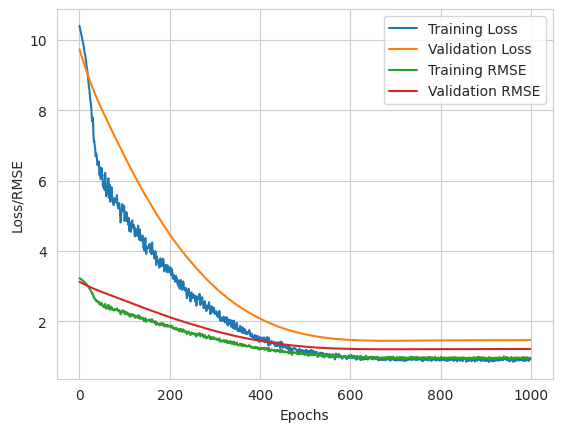

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Loss/RMSE')
plt.legend()
plt.show()

In [22]:
def get_recommendations(user_id, top_n=5):
    # Transform user_id to encoded value
    user_encoded = user_encoder.transform([user_id])[0]

    # Create a list of all products
    product_ids = df['Product ID'].unique()
    user_ids = np.array([user_encoded] * len(product_ids))

    # Predict ratings for all products for this user
    predicted_ratings = model.predict([user_ids, product_ids]).flatten()

    # Get the top N product recommendations
    top_product_indices = predicted_ratings.argsort()[-top_n:][::-1]
    recommended_products = df.iloc[top_product_indices][['Product ID', 'Product Name']]

    # Add the predicted ratings to the DataFrame
    recommended_products['Predicted Rating'] = predicted_ratings[top_product_indices]

    return recommended_products


# Example usage:
user_id = 55  # Replace with a valid user ID from your dataset
top_n = 5
recommended_products = get_recommendations(user_id, top_n)
print(f"Top {top_n} product recommendations for User ID {user_id}:")
print(recommended_products)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Top 5 product recommendations for User ID 55:
     Product ID Product Name  Predicted Rating
316         316        Dress          3.458436
358         358        Dress          3.401927
796         796      Sweater          3.190774
444         444      Sweater          3.186085
15           15        Dress          3.180759


Model *collaborative filtering* telah menghasilkan rekomendasi produk yang dipersonalisasi untuk User ID 55, menampilkan 5 produk terbaik dengan prediksi rating. Berikut adalah beberapa insight dari hasil tersebut:

1. **Preferensi Terhadap Dress**: Tiga produk teratas yang direkomendasikan adalah dress (ID Produk 316, 358, dan 15). Ini menunjukkan bahwa User 55 kemungkinan besar memiliki ketertarikan pada produk dress. Prediksi rating untuk produk ini relatif lebih tinggi dibandingkan produk lainnya, mengindikasikan kecocokan yang kuat antara pengguna dan produk.

2. **Minat pada Sweater**: Produk dengan ID 796 dan 444, keduanya adalah sweater, juga muncul dalam daftar rekomendasi. Meskipun prediksi rating untuk sweater sedikit lebih rendah daripada dress, produk ini masih berada di peringkat yang cukup tinggi, menandakan bahwa User 55 memiliki minat yang moderat terhadap sweater.

3. **Rentang Rating Produk**: Prediksi rating berkisar antara 3,18 hingga 3,46, yang menunjukkan bahwa model melihat produk-produk ini sebagai pilihan yang hampir sama relevan bagi User 55. Rentang rating yang konsisten ini mungkin menandakan bahwa pengguna memiliki ketertarikan yang seimbang antara kategori dress dan sweater, meskipun dress sedikit lebih unggul.

4. **Potensi Keterlibatan Lebih Lanjut**: Produk dengan prediksi rating mendekati atau di atas 3,4 (Dress dengan ID 316 dan 358) mungkin memiliki peluang lebih besar untuk menarik perhatian pengguna (misalnya, klik atau pembelian). Menawarkan promosi atau menonjolkan produk-produk ini dalam rekomendasi bisa meningkatkan interaksi pengguna.

5. **Strategi Pemasaran yang Potensial**: Berdasarkan daftar rekomendasi ini, User 55 dapat ditargetkan dengan kampanye pemasaran yang berfokus pada koleksi dress terbaru atau penawaran eksklusif untuk produk dress dan sweater.

# Hybrid Recommendations

In [23]:
def get_hybrid_recommendations(user_id, product_id, top_n):
    # Get content-based recommendations
    content_based_recommendations = get_content_based_recommendations(product_id, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_recommendations = get_recommendations(user_id, top_n)

    # Extract Product IDs from both methods
    content_based_ids = content_based_recommendations['Product ID'].values
    collaborative_ids = collaborative_filtering_recommendations['Product ID'].values

    # Combine recommendations and remove duplicates
    hybrid_recommendations_ids = list(set(content_based_ids) | set(collaborative_ids))

    # Retrieve product details (name and content) for the hybrid recommendations
    hybrid_recommendations_content = content_df[content_df['Product ID'].isin(hybrid_recommendations_ids)]

    # Merge with predicted ratings from collaborative filtering
    hybrid_recommendations_content = pd.merge(
        hybrid_recommendations_content,
        collaborative_filtering_recommendations[['Product ID', 'Predicted Rating']],
        on='Product ID',
        how='left'
    )

    # Fill NaN values in 'Predicted Rating' with the average rating or another default value
    default_rating = collaborative_filtering_recommendations['Predicted Rating'].mean()
    hybrid_recommendations_content['Predicted Rating'].fillna(default_rating, inplace=True)

    # Limit to top_n recommendations
    return hybrid_recommendations_content.head(top_n)


In [24]:
user_id = 100  # Replace with actual user ID
product_id = 999  # Replace with actual product ID
top_n = 5
hybrid_recommendations = get_hybrid_recommendations(user_id, product_id, top_n)

# Display the recommended product names, content, and predicted ratings
print(f"Hybrid recommendations for User ID {user_id} and Product ID {product_id}:")
hybrid_recommendations[['Product ID', 'Product Name', 'Content', 'Predicted Rating']]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Hybrid recommendations for User ID 100 and Product ID 999:


<ipython-input-23-b22d8ec0fa96>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hybrid_recommendations_content['Predicted Rating'].fillna(default_rating, inplace=True)


,Product ID,Product Name,Content,Predicted Rating
0,8,Sweater,8 Sweater Zara Kids' Fashion Blue XL,3.407689
1,81,T-shirt,81 T-shirt Nike Women's Fashion Green S,3.505691
2,165,Jeans,165 Jeans Gucci Women's Fashion White XL,3.530476
3,198,T-shirt,198 T-shirt Zara Men's Fashion Blue XL,3.407689
4,287,T-shirt,287 T-shirt Zara Kids' Fashion Blue XL,3.407689


Hasil dari **hybrid recommendation model** yang ditampilkan menunjukkan 5 produk teratas yang direkomendasikan berdasarkan kombinasi dari pendekatan *collaborative filtering* dan *content-based filtering*. Berikut adalah beberapa insight yang bisa diambil dari hasil tersebut:

1. **Beragam Kategori Produk**: Rekomendasi yang diberikan mencakup berbagai kategori produk seperti sweater, t-shirt, dan jeans. Hal ini menunjukkan bahwa model mampu mengidentifikasi preferensi pengguna yang beragam, tidak hanya pada satu kategori produk saja. User cenderung tertarik pada berbagai jenis pakaian, mulai dari pakaian kasual seperti t-shirt hingga pakaian yang lebih spesifik seperti jeans dan sweater.

2. **Preferensi Terhadap Merek dan Ukuran**:
   - **Zara** mendominasi dalam beberapa produk, terutama sweater dan t-shirt dengan ukuran XL. Ini menunjukkan bahwa User mungkin menyukai merek Zara dan lebih memilih ukuran yang lebih besar.
   - Produk dari merek **Nike** dan **Gucci** juga masuk dalam daftar rekomendasi, mengindikasikan bahwa User mungkin juga tertarik pada produk fashion premium atau merek terkenal.
   
3. **Rating Produk yang Relatif Konsisten**: Prediksi rating berkisar antara 3,40 hingga 3,53, yang menunjukkan bahwa semua produk dalam daftar ini dianggap relevan bagi User. Namun, produk dengan prediksi rating tertinggi adalah jeans dari Gucci (ID 165), yang mungkin merupakan pilihan yang lebih menarik dibandingkan produk lainnya.

4. **Strategi Pemasaran Berbasis Personalisasi**: Berdasarkan preferensi pengguna, strategi pemasaran bisa difokuskan pada produk-produk fashion dengan merek premium dan ukuran tertentu (misalnya XL). Promosi t-shirt, jeans, dan sweater dari merek-merek populer seperti Zara, Nike, dan Gucci kemungkinan besar akan mendapatkan respons positif dari User.

5. **Pengaruh *Content-based Filtering***: Rekomendasi ini tidak hanya berdasarkan interaksi pengguna sebelumnya (seperti pada *collaborative filtering*), tapi juga berdasarkan kesamaan konten produk (misalnya merek, kategori, ukuran). Dengan demikian, model dapat memberikan saran yang lebih beragam dan relevan, meskipun pengguna belum pernah melihat produk tersebut sebelumnya.

### Kesimpulan:
Hybrid model memberikan rekomendasi yang lebih seimbang, baik dari sisi preferensi pengguna berdasarkan perilaku maupun dari karakteristik produk. Strategi marketing dapat lebih terarah pada kombinasi produk yang sesuai dengan selera pengguna, seperti pakaian kasual dengan merek premium dan ukuran yang sesuai.